<a href="https://colab.research.google.com/github/urvashiramdasani/ml-dl-python/blob/master/ML/18BCE247_BDA_Practical_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Submitted By : Urvashi Ramdasani

Roll Number : 18BCE247

Learning limitation of data analytics by applying Machine Learning Techniques on large amount of data. Write a  program to read data set from any online website, excel file and CSV file and to perform  

a)   Linear regression and logistic regression on iris dataset.         

b)   K-means clustering. 

### Linear Regression

In [57]:
# Load the libraries

import numpy
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.cluster import KMeans

In [3]:
# Load the Data

X, y = datasets.load_iris(return_X_y = True)
print('Shape of Independent Variables : ', X.shape)
print('Shape of Dependent Variables : ', y.shape)

Shape of Independent Variables :  (150, 4)
Shape of Dependent Variables :  (150,)


In [24]:
df = pd.DataFrame(data = X, columns = ['Sepal Length (cm)', 'Sepal Width (cm)', 'Petal Length (cm)', 'Petal Width (cm)'])
df

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [25]:
target_df = pd.DataFrame(data = y, columns = ['Species'])
target_df

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [26]:
df = pd.concat([df, target_df], axis = 1)
df

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [7]:
# Linear Regression

regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
regr.score(X_test, y_test)

0.9468960016420045

In [9]:
# Error Calculation

y_predicted = regr.predict(X_test)
print('Mean Squared Error : ', metrics.mean_squared_error(y_true = y_test, y_pred = y_predicted))
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_true = y_test, y_pred = y_predicted))

Mean Squared Error :  0.037113794407976866
Mean Absolute Error :  0.14637694965308523


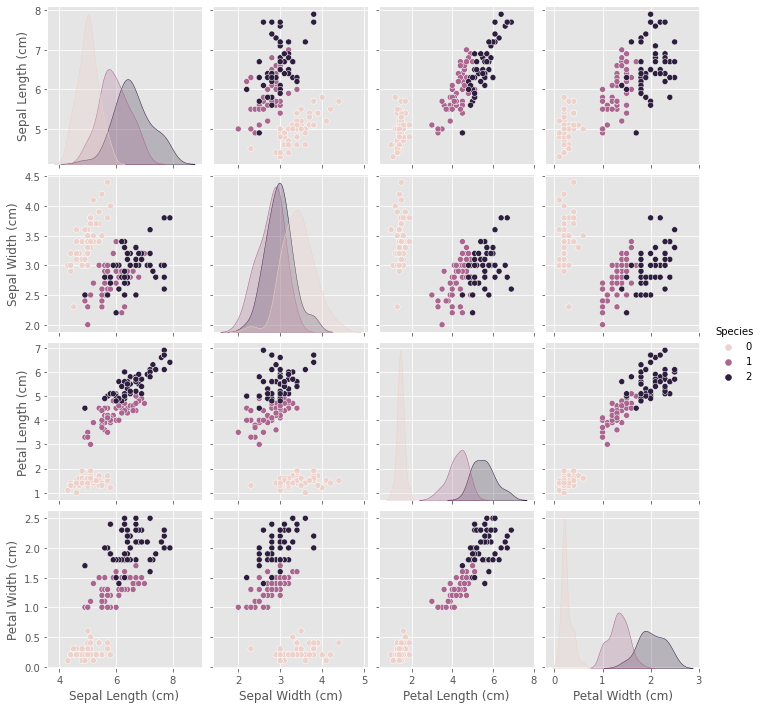

In [27]:
plt.style.use('ggplot')
sns.pairplot(df, hue= 'Species')

In [47]:
# Testing
n = numpy.random.randint(0, 30)
print(n, X_test[n], y_test[n])

17 [5.6 2.5 3.9 1.1] 1


In [48]:
test_df = {'Sepal Length (cm)' : [5.6], 'Sepal Width (cm)' : [2.5], 'Petal Length (cm)' : [3.9], 'Petal Width (cm)' : [1.1]}
test_df = pd.DataFrame(data = test_df)

In [49]:
test_df

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
0,5.6,2.5,3.9,1.1


In [50]:
test_target = {'Species' : [1]}
test_target = pd.DataFrame(data = test_target)
test_df = pd.concat([test_df, test_target], axis = 1)
test_df

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
0,5.6,2.5,3.9,1.1,1


In [51]:
test = test_df.drop('Species', axis = 1)
test

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
0,5.6,2.5,3.9,1.1


In [52]:
regr.predict(test)

array([1.04812731])

### Logistic Regression

In [53]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
lr.score(X_test, y_test)

1.0

In [55]:
# Error Calculation

y_predicted = lr.predict(X_test)
print('Mean Squared Error : ', metrics.mean_squared_error(y_true = y_test, y_pred = y_predicted))
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_true = y_test, y_pred = y_predicted))

Mean Squared Error :  0.0
Mean Absolute Error :  0.0


In [56]:
lr.predict(test)

array([1])

### K-Means Clustering

In [58]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [59]:
kmeans.labels_

array([1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 0, 2, 0, 2, 0,
       2, 1, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 0, 1, 2, 2, 1, 2, 2,
       2, 2, 0, 2, 1, 2, 0, 1, 1, 2, 0, 1, 2, 1, 1, 2, 2, 0, 2, 0, 0, 2,
       1, 1, 2, 0, 1, 1, 1, 2, 0, 1, 0, 0, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0,
       2, 2, 2, 1, 2, 2, 1, 2, 0, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0,
       2, 2, 2, 2, 1, 2, 2, 1, 2, 0], dtype=int32)

In [67]:
kmeans.predict(X_test)

array([2, 1, 0, 2, 2, 1, 2, 0, 2, 2, 0, 1, 1, 1, 1, 2, 0, 2, 2, 0, 1, 2,
       1, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [66]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [65]:
kmeans.score(X_test, y_test)

-14.150394520955281

In [68]:
kmeans.cluster_centers_

array([[6.85517241, 3.10344828, 5.70689655, 2.02068966],
       [4.99      , 3.4525    , 1.45      , 0.245     ],
       [5.85686275, 2.73137255, 4.38627451, 1.44313725]])